In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import spikeinterface.full as si
import matplotlib.pyplot as plt

from pathlib import Path

import spikeinterface.extractors as se

import neo


/home/samuel/.virtualenvs/py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_folder = Path('/data2/MilesasData/bin_test_this_is_the_correct/')

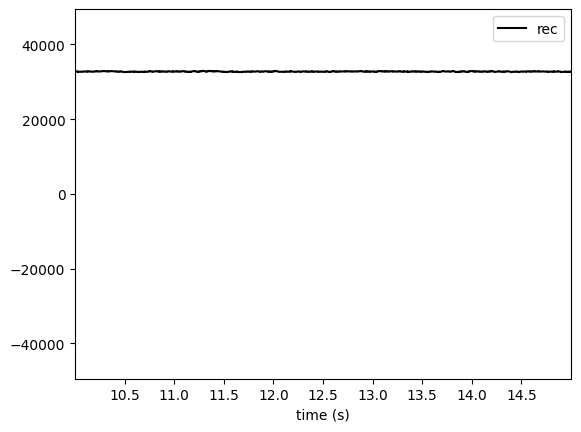

In [33]:

# pure binary
filename = base_folder / '221114_Hav_0000_nothing.raw'

rec = si.read_binary(filename, dtype='uint16', num_chan=97, sampling_frequency=20_000.)
rec.channel_ids

si.plot_timeseries(rec, time_range=(10, 15), channel_ids=[80,])



In [11]:
# binary + MCS header
filename = base_folder / '221114_Hav_0000_writeheader_signed16bit.raw'


rec = se.read_mcsraw(filename)
rec


b'MC_DataTool binary conversion\r\nVersion 2.6.15\r\nMC_REC file = "C:\\Multi Channel Systems\\LotteryTask_Recording\\Havane\\Raw\\221114_Hav\\221114_Hav_0000.mcd"\r\nSample rate = 20000\r\nADC zero = 32768\r\nDi = 0.0000\xb5V/AD;El = 0.3815\xb5V/AD;Fi = 0.3815\xb5V/AD\r\nStreams = Di_D1;El_01;El_02;El_03;El_04;El_05;El_06;El_07;El_08;El_09;El_10;El_11;El_12;El_13;El_14;El_15;El_16;El_17;El_18;El_19;El_20;El_21;El_22;El_23;El_24;El_25;El_26;El_27;El_28;El_29;El_30;El_31;El_32;Fi_01;Fi_02;Fi_03;Fi_04;Fi_05;Fi_06;Fi_07;Fi_08;Fi_09;Fi_10;Fi_11;Fi_12;Fi_13;Fi_14;Fi_15;Fi_16;Fi_17;Fi_18;Fi_19;Fi_20;Fi_21;Fi_22;Fi_23;Fi_24;Fi_25;Fi_26;Fi_27;Fi_28;Fi_29;Fi_30;Fi_31;Fi_32;Fi_01;Fi_02;Fi_03;Fi_04;Fi_05;Fi_06;Fi_07;Fi_08;Fi_09;Fi_10;Fi_11;Fi_12;Fi_13;Fi_14;Fi_15;Fi_16;Fi_17;Fi_18;Fi_19;Fi_20;Fi_21;Fi_22;Fi_23;Fi_24;Fi_25;Fi_26;Fi_27;Fi_28;Fi_29;Fi_30;Fi_31;Fi_32\r\nEOH\r\n\x00\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

KeyError: 'sampling_rate'

In [34]:
# filename = base_folder / '221114_Hav_0000_writeheader.raw'
filename = base_folder / '221114_Hav_0000_writeheader_signed16bit.raw'

# rec = se.read_mcsraw(filename)
reader = neo.rawio.RawMCSRawIO(filename)
reader.parse_header()
reader

b'\x00\x00\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x00\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x80\x00\x

AssertionError: Error in reading raw mcs header

In [21]:
filename = base_folder / '221114_Hav_0000.h5'
rec = se.read_mcsh5(filename)
rec

AssertionError: Unexpected units found, expected volts, found NoUnit